In [130]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [131]:
img = cv2.cvtColor(cv2.imread("img/tres.jpg"), cv2.COLOR_BGR2RGB)
img.shape

(564, 1000, 3)

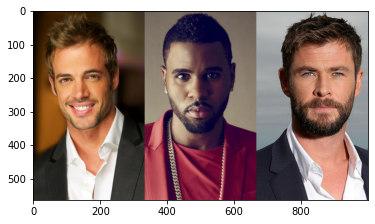

In [132]:
plt.imshow(img)

In [133]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

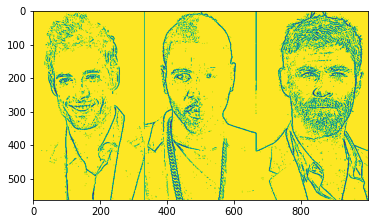

In [134]:
plt.imshow(edge_mask(img, 3, 3))

In [135]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

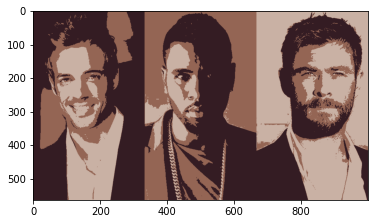

In [136]:
plt.imshow(color_quantization(img, 3))

In [137]:
def bileteral_filter(img, d, sigmaColor, sigmaSpace):
    return cv2.bilateralFilter(img, d=d, sigmaColor=sigmaColor,sigmaSpace=sigmaSpace)

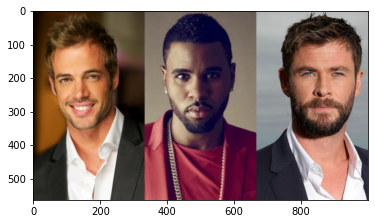

In [138]:
plt.imshow(bileteral_filter(img, 2, 1000, 1000))

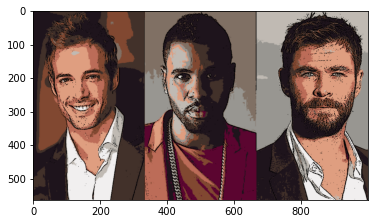

In [139]:
edges = edge_mask(img, 3, 3)
colors = color_quantization(img, 10)
colors = bileteral_filter(colors, 1, 2000, 2000)
cartoon = cv2.bitwise_and(colors, colors, mask=edges)
plt.imshow(cartoon)

In [168]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

In [169]:
detected_faces = face_cascade.detectMultiScale(cv2.cvtColor(cartoon, cv2.COLOR_RGB2GRAY))

In [180]:
face = np.copy(img)
for (column, row, width, height) in detected_faces:
    roi_color = img[row:row + height, column:column + width]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(width) + str(height) + '_faces.jpg', roi_color)

    cv2.rectangle(
        face,
        (column, row),
        (column + width, row + height),
        (0, 255, 0),
        2
    )

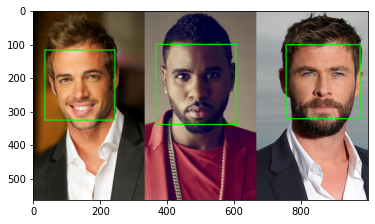

In [181]:
roi_color = img[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)
plt.imshow(face)

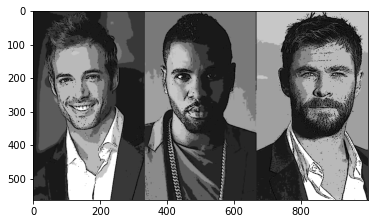

In [144]:
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_RGB2GRAY), cmap='gray' )